<a href="https://colab.research.google.com/github/jmquintana/copa_america/blob/main/copa_america.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import random as rnd
from collections import namedtuple
from collections import Counter

In [2]:
# Le doy formato a los gráficos
sns.set_style("darkgrid")
plt.rc('font', size=10)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=16)
plt.rc('axes', labelsize=14) 
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [3]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Codigo para poder imprimir multiples outputs en una misma línea
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Monto mi Google Drive para cargar el DataSet
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cargo el DataSet con Pandas como un DataFrame nombrado "df"
# Previamente debe descargarse del siguiente link: https://www.kaggle.com/ramnquintana/resultados-de-futbol-entre-1872-y-2017?select=results.csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/results.csv")

In [6]:
print("Columnas:",df.shape[1])
print("Filas:",df.shape[0])

Columnas: 9
Filas: 41243


In [7]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# convert the 'Date' column to datetime format
df['date'] = df['date'].astype('datetime64[ns]')

In [9]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [10]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
teams = ['Argentina',
          'Chile',
          'Paraguay',
          'Uruguay',
          'Bolivia',
          'Brazil',
          'Colombia',
          'Peru',
          'Venezuela',
          'Ecuador']

In [12]:
arpy = ['Argentina',
        'Paraguay']

In [13]:
df_ = df[df.home_team.isin(arpy) & df.away_team.isin(arpy)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


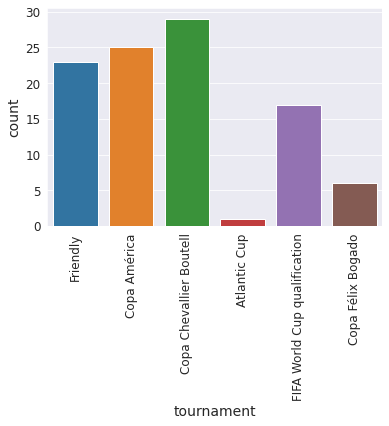

In [14]:
sns.countplot(df_.tournament)
plt.xticks(rotation=90)
plt.show()

In [15]:
df_ = df_[df_.tournament == 'Copa América']
print(df_.shape)
df_

(25, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
601,1921-10-16,Argentina,Paraguay,3,0,Copa América,Buenos Aires,Argentina,False
666,1922-10-18,Argentina,Paraguay,2,0,Copa América,Rio de Janeiro,Brazil,True
750,1923-10-29,Argentina,Paraguay,4,3,Copa América,Montevideo,Uruguay,True
836,1924-10-12,Argentina,Paraguay,0,0,Copa América,Montevideo,Uruguay,True
925,1925-11-29,Argentina,Paraguay,2,0,Copa América,Buenos Aires,Argentina,False
931,1925-12-20,Argentina,Paraguay,3,1,Copa América,Buenos Aires,Argentina,False
1000,1926-10-20,Argentina,Paraguay,8,0,Copa América,Santiago,Chile,True
1244,1929-11-10,Argentina,Paraguay,4,1,Copa América,Buenos Aires,Argentina,False
1928,1937-01-09,Argentina,Paraguay,6,1,Copa América,Buenos Aires,Argentina,False
2368,1942-01-11,Argentina,Paraguay,4,3,Copa América,Montevideo,Uruguay,True


In [16]:
df2 = df[df.date > '2010-01-01']
df2 = df2[df2.home_team.isin(teams) & df2.away_team.isin(teams)]
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
31987,2010-03-31,Chile,Venezuela,0,0,Friendly,Temuco,Chile,False
32168,2010-06-28,Brazil,Chile,3,0,FIFA World Cup,Johannesburg,South Africa,True
32196,2010-08-11,Bolivia,Colombia,1,1,Friendly,La Paz,Bolivia,False
32277,2010-09-03,Venezuela,Colombia,0,2,Friendly,Puerto la Cruz,Venezuela,False
32343,2010-09-07,Venezuela,Ecuador,1,0,Friendly,Barquisimeto,Venezuela,False


In [17]:
df2_1 = df2[['date', 'home_team', 'home_score', 'away_score']].rename({'home_team':'team', 'home_score':'team_score', 'away_score':'opponent_score'}, axis=1)
df2_2 = df2[['date', 'away_team', 'away_score', 'home_score']].rename({'away_team':'team', 'away_score':'team_score', 'home_score':'opponent_score'}, axis=1)
df3 = df2_1.append(df2_2).sort_values('date').reset_index(drop=True)
df3.head()

,date,team,team_score,opponent_score
0,2010-03-31,Chile,0,0
1,2010-03-31,Venezuela,0,0
2,2010-06-28,Brazil,3,0
3,2010-06-28,Chile,0,3
4,2010-08-11,Bolivia,1,1


In [18]:
vs = ['Argentina', 'Brazil']
df_vs = df3[df3.team.isin(vs)]
df_ar = df3[df3.team == 'Argentina']
df_br = df3[df3.team == 'Brazil']

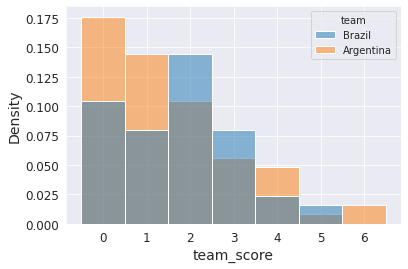

In [19]:
sns.histplot(data=df_vs, x='team_score', discrete=True, stat="density", hue='team')
plt.xticks([0,1,2,3,4,5,6])
plt.show()

In [20]:
def gameSim(home_team, away_team):

    df_home = df3[df3.team == home_team]
    df_away = df3[df3.team == away_team]

    # home_meanpts = df_home.team_score.mean()
    # away_meanpts = df_away.team_score.mean()
    # home_sdpts = df_home.team_score.std()
    # away_sdpts = df_away.team_score.std()

    # home_meanopp = df_home.opponent_score.mean()
    # away_meanopp = df_away.opponent_score.mean()
    # home_sdopp = df_home.opponent_score.std()
    # away_sdopp = df_away.opponent_score.std()

    # homeScore = int((rnd.gauss(home_meanpts,home_sdpts) + rnd.gauss(away_meanopp,away_sdopp))/2)
    # awayScore = int((rnd.gauss(away_meanpts,away_sdpts) + rnd.gauss(home_meanopp,home_sdopp))/2)

    homeScore = int(round((rnd.choice(df_home.team_score.values) + rnd.choice(df_away.opponent_score.values))/2))
    awayScore = int(round((rnd.choice(df_away.team_score.values) + rnd.choice(df_home.opponent_score.values))/2))

    if homeScore > awayScore:
        return {'res': 1,
                'homeScore': homeScore,
                'awayScore': awayScore}
    elif int(round(homeScore)) < int(round(awayScore)):
        return {'res': -1,
                'homeScore': homeScore,
                'awayScore': awayScore}
    else:
        return {'res': 0,
                'homeScore': homeScore,
                'awayScore': awayScore}

In [21]:
def gamesSim(home_team, away_team, ns, p=False):
    gamesout = []
    game_res = []
    team1win = 0
    team2win = 0
    tie = 0
    Result = namedtuple("Result", "homeScore awayScore")
    for i in range(ns):
        game = gameSim(home_team, away_team)
        gm = game['res']
        gamesout.append(gm)
        gr = Result(game['homeScore'], game['awayScore'])
        game_res.append(gr)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    if p:
        print(home_team + ' Win ', team1win/(team1win+team2win+tie)*100,'%')
        print(away_team + ' Win ', team2win/(team1win+team2win+tie)*100,'%')
        print('Tie ', tie/(team1win+team2win+tie)*100, '%')
    frequency = Counter(game_res)
    return frequency.most_common()
    # return game_res

In [22]:
gamesSim('Argentina', 'Paraguay', 100)

[(Result(homeScore=2, awayScore=0), 21),
 (Result(homeScore=2, awayScore=1), 20),
 (Result(homeScore=2, awayScore=2), 11),
 (Result(homeScore=0, awayScore=0), 8),
 (Result(homeScore=0, awayScore=1), 8),
 (Result(homeScore=1, awayScore=2), 6),
 (Result(homeScore=1, awayScore=0), 4),
 (Result(homeScore=1, awayScore=1), 4),
 (Result(homeScore=0, awayScore=2), 3),
 (Result(homeScore=4, awayScore=0), 3),
 (Result(homeScore=3, awayScore=2), 3),
 (Result(homeScore=4, awayScore=1), 2),
 (Result(homeScore=3, awayScore=1), 2),
 (Result(homeScore=4, awayScore=2), 2),
 (Result(homeScore=3, awayScore=0), 2),
 (Result(homeScore=6, awayScore=2), 1)]

In [23]:
gamesSim('Argentina', 'Peru', 1)

[(Result(homeScore=3, awayScore=0), 1)]

In [24]:
gamesSim('Argentina', 'Venezuela', 1)

[(Result(homeScore=1, awayScore=0), 1)]

In [27]:
gamesSim('Argentina', 'Brazil', 1)

[(Result(homeScore=0, awayScore=2), 1)]